<a href="https://colab.research.google.com/github/SaiifAli77/QSAR-for-serotonin-transporter/blob/main/QSAR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install rdkit lazypredict gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 36.8 MB 360 kB/s 
     |████████████████████████████████| 5.3 MB 51.6 MB/s 
     |████████████████████████████████| 84 kB 3.8 MB/s 
     |████████████████████████████████| 212 kB 70.9 MB/s 
     |████████████████████████████████| 54 kB 3.5 MB/s 
     |████████████████████████████████| 55 kB 2.6 MB/s 
     |████████████████████████████████| 84 kB 3.1 MB/s 
     |████████████████████████████████| 57 kB 4.8 MB/s 
     |████████████████████████████████| 112 kB 51.0 MB/s 
     |████████████████████████████████| 2.3 MB 11.1 MB/s 
     |████████████████████████████████| 270 kB 68.2 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 80 kB 4.7 MB/s 
     |████████████████████████████████| 68 kB 7.3 MB/s 
     |████████████████████████████████| 46 kB 2.5 MB/s 
     |████████████████████████████████| 594 kB 45

In [ ]:
import lazypredict
from lazypredict.Supervised import LazyRegressor

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.stats import mannwhitneyu

from sklearn import metrics

from rdkit import Chem, DataStructs
from rdkit.Chem import PandasTools, AllChem, Descriptors, Lipinski
from rdkit.Chem.rdmolops import GetAdjacencyMatrix

import tensorflow as tf

import seaborn as sns

import os

from sklearn import metrics, model_selection,ensemble,feature_selection,preprocessing,feature_selection,svm

import gradio as gr
import pickle

#Read and clean the data (SLC6A4)

##import the data

In [ ]:
df_1 = pd.read_csv("/content/SLC6A4_01_bioactivity_data_raw.csv")
df_1

,Original_Entry_ID,pXC50,SMILES
0,CHEMBL497963,5.80,N=1C=2C=CC=C(OCCN3CCC(CC3)CC=4C=CC=C(C4)N=S(C)...
1,CHEMBL202565,5.39,C1CN(CC(CCC)C(=O)C=2C=CC(=CC2)C)CC1
2,CHEMBL311469,5.49,C=1C(NC(=O)C)=CC=C2C1CC3=CC=CC=C23
3,CHEMBL2037432,6.04,N1(CCC(CC1)(O)C=2C=CC(=CC2)Cl)CCCCC=3SC=4C(N3)...
4,45279667,7.03,ClC1=CC=C(C=2N(C(=C(C(=O)NCCCN3CCN(CC3)C=4C(=C...
...,...,...,...
4050,CHEMBL126484,7.70,N1C=C(CCCNCCOC2=C(OC)C=CC=C2)C=3C1=CC=C(F)C3
4051,CHEMBL282380,5.74,C=1C=CC(C(C=2C=CC=CC2)OCCN3CCN(CC3)C[C@@H](CC4...
4052,CHEMBL28149,5.66,C=1C=CC(C(C=2C=CC=CC2)OCCN3CCN(CC3)C[C@H](CC4=...
4053,44419306,5.26,FC1=CC=C(C[C@H]2C[C@@H](N(CC2)C(=O)C)CCCNC(=O)...


##clean the data

In [ ]:
df2 = df_1[df_1['pXC50'].notna()]
df2 = df2[df_1["SMILES"].notna()]
df3 = df2.drop_duplicates(['SMILES'])
df3

,Original_Entry_ID,pXC50,SMILES
0,CHEMBL497963,5.80,N=1C=2C=CC=C(OCCN3CCC(CC3)CC=4C=CC=C(C4)N=S(C)...
1,CHEMBL202565,5.39,C1CN(CC(CCC)C(=O)C=2C=CC(=CC2)C)CC1
2,CHEMBL311469,5.49,C=1C(NC(=O)C)=CC=C2C1CC3=CC=CC=C23
3,CHEMBL2037432,6.04,N1(CCC(CC1)(O)C=2C=CC(=CC2)Cl)CCCCC=3SC=4C(N3)...
4,45279667,7.03,ClC1=CC=C(C=2N(C(=C(C(=O)NCCCN3CCN(CC3)C=4C(=C...
...,...,...,...
4050,CHEMBL126484,7.70,N1C=C(CCCNCCOC2=C(OC)C=CC=C2)C=3C1=CC=C(F)C3
4051,CHEMBL282380,5.74,C=1C=CC(C(C=2C=CC=CC2)OCCN3CCN(CC3)C[C@@H](CC4...
4052,CHEMBL28149,5.66,C=1C=CC(C(C=2C=CC=CC2)OCCN3CCN(CC3)C[C@H](CC4=...
4053,44419306,5.26,FC1=CC=C(C[C@H]2C[C@@H](N(CC2)C(=O)C)CCCNC(=O)...


In [ ]:
df3 = df3.sample(frac=1)
df3

,Original_Entry_ID,pXC50,SMILES
3819,53319482,5.60,ClC=1C=C([C@H]2[C@H](NC)CCC=3C2=CC=CC3)C=CC1Cl
691,CHEMBL326713,4.50,C=12C(=C(O[C@H](C=3SC=CC3)CCNC)C=CC1)C=CC(=C2O)O
3914,CHEMBL182288,7.64,C12=C(C=3C=C4OCOC4=CC3N=C1O)CCC[C@@H]2N5CCN(CC...
1776,CHEMBL261076,7.55,O1C(CNCC1)C(C2=CC=CC=C2)OC3=CC=C(C=C3OC)Cl
1530,CHEMBL566356,8.10,C1(=CC=CC=2N=C(OC21)O)N3[C@H]4CN([C@H](C4)C3)C...
...,...,...,...
1270,44625571,9.10,ClC1=CC(O[C@@H]([C@@H]2CCNC2)C3=CC=CC=C3)=CC(C...
4037,46230766,8.60,N1C(CCCC1)CCC=2C=3C(NC2)=CC=C(C3)C#N
3527,44430368,8.74,O(CCCN1CCN(CC1)C(C)C)C2=CC3=C(C(CN(C3)C)C4=CC=...
2959,90665087,7.85,ClC=1C(=C(N2CCN(CC2)CCCNC(=O)C=3N=C(N(C3C)C4=C...


In [ ]:
df3.reset_index(inplace=True)
df3 = df3.drop("index", axis=1)

In [ ]:
df3

,Original_Entry_ID,pXC50,SMILES
0,53319482,5.60,ClC=1C=C([C@H]2[C@H](NC)CCC=3C2=CC=CC3)C=CC1Cl
1,CHEMBL326713,4.50,C=12C(=C(O[C@H](C=3SC=CC3)CCNC)C=CC1)C=CC(=C2O)O
2,CHEMBL182288,7.64,C12=C(C=3C=C4OCOC4=CC3N=C1O)CCC[C@@H]2N5CCN(CC...
3,CHEMBL261076,7.55,O1C(CNCC1)C(C2=CC=CC=C2)OC3=CC=C(C=C3OC)Cl
4,CHEMBL566356,8.10,C1(=CC=CC=2N=C(OC21)O)N3[C@H]4CN([C@H](C4)C3)C...
...,...,...,...
4037,44625571,9.10,ClC1=CC(O[C@@H]([C@@H]2CCNC2)C3=CC=CC=C3)=CC(C...
4038,46230766,8.60,N1C(CCCC1)CCC=2C=3C(NC2)=CC=C(C3)C#N
4039,44430368,8.74,O(CCCN1CCN(CC1)C(C)C)C2=CC3=C(C(CN(C3)C)C4=CC=...
4040,90665087,7.85,ClC=1C(=C(N2CCN(CC2)CCCNC(=O)C=3N=C(N(C3C)C4=C...


In [ ]:
def f(x):
    if float(x) >= 6:
        return "active"
    elif float(x) < 5:
        return "inactive"
    else:
        return "intermediate"

In [ ]:
df3["act"] = df3["pXC50"].map(f)
df3

,Original_Entry_ID,pXC50,SMILES,act
0,53319482,5.60,ClC=1C=C([C@H]2[C@H](NC)CCC=3C2=CC=CC3)C=CC1Cl,intermediate
1,CHEMBL326713,4.50,C=12C(=C(O[C@H](C=3SC=CC3)CCNC)C=CC1)C=CC(=C2O)O,inactive
2,CHEMBL182288,7.64,C12=C(C=3C=C4OCOC4=CC3N=C1O)CCC[C@@H]2N5CCN(CC...,active
3,CHEMBL261076,7.55,O1C(CNCC1)C(C2=CC=CC=C2)OC3=CC=C(C=C3OC)Cl,active
4,CHEMBL566356,8.10,C1(=CC=CC=2N=C(OC21)O)N3[C@H]4CN([C@H](C4)C3)C...,active
...,...,...,...,...
4037,44625571,9.10,ClC1=CC(O[C@@H]([C@@H]2CCNC2)C3=CC=CC=C3)=CC(C...,active
4038,46230766,8.60,N1C(CCCC1)CCC=2C=3C(NC2)=CC=C(C3)C#N,active
4039,44430368,8.74,O(CCCN1CCN(CC1)C(C)C)C2=CC3=C(C(CN(C3)C)C4=CC=...,active
4040,90665087,7.85,ClC=1C(=C(N2CCN(CC2)CCCNC(=O)C=3N=C(N(C3C)C4=C...,active


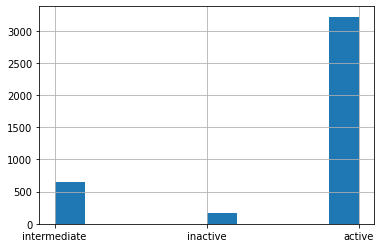

In [ ]:
df3["act"].hist()

In [ ]:
data = df3

#Molecular Data analysis

In [ ]:
def lipinski(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [ ]:
df_lipinski = lipinski(data["SMILES"])
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,339.77,4.54,1.00,3.00
1,493.60,5.38,2.00,3.00
2,432.58,5.23,1.00,3.00
3,738.62,9.56,0.00,6.00
4,286.35,3.79,1.00,3.00
...,...,...,...,...
4037,495.55,4.81,0.00,6.00
4038,281.37,2.92,1.00,3.00
4039,251.76,2.61,1.00,2.00
4040,289.38,2.43,0.00,4.00


In [ ]:
data_l = pd.concat([data,df_lipinski],axis =1)
data_l

,Original_Entry_ID,pXC50,SMILES,act,MW,LogP,NumHDonors,NumHAcceptors
0,53322027,5.69,ClC=1C(OC2=C(OC3CCNCC3)C(F)=CC=C2)=C(F)C=CC1,intermediate,339.77,4.54,1.00,3.00
1,11271864,7.36,FC1=C2OCC(N(C3CCC3)CCCC=4C=5C(NC4)=CC=C(F)C5)C...,active,493.60,5.38,2.00,3.00
2,CHEMBL67024,6.66,N1(CCC(CC1)NCCC2=CC=C(C=C2)F)CCOC(C3=CC=CC=C3)...,active,432.58,5.23,1.00,3.00
3,CHEMBL399740,7.51,C12N(C(CC1)C[C@@H]([C@@H]2COC(CCCCCCC(OC[C@H]3...,active,738.62,9.56,0.00,6.00
4,44133863,7.44,FC1=C(OC2=NC=CC=C2C3CCNCC3)C=CC(=C1)C,active,286.35,3.79,1.00,3.00
...,...,...,...,...,...,...,...,...
4037,44579538,6.96,FC(F)(F)C1=CC(N2CCN(CC2)CCCCN3N=C(N4C=5C(C=C4)...,active,495.55,4.81,0.00,6.00
4038,CHEMBL473966,7.74,CNCCC1OC(CCC2=C(C=CC(=C2)F)OC)CC1,active,281.37,2.92,1.00,3.00
4039,CHEMBL1173412,7.80,C1CNC[C@@]2([C@@]1(C3=CC=C(C=C3)Cl)C2)COC,active,251.76,2.61,1.00,2.00
4040,CHEMBL512202,8.37,[C@H]12CC[C@@H](N1C)C[C@@H]([C@@H]2C(OC)=O)C3=...,active,289.38,2.43,0.00,4.00


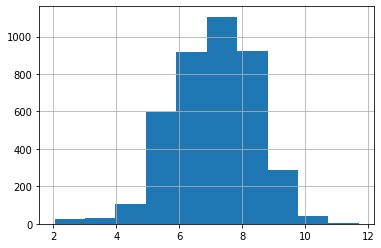

In [ ]:
data["pXC50"].hist()

Text(0, 0.5, 'Frequency')

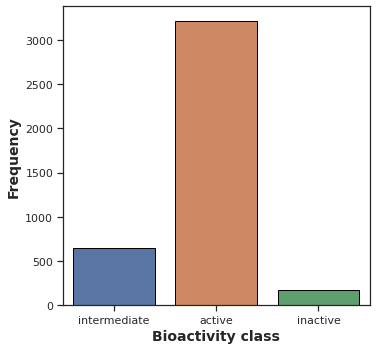

In [ ]:
sns.set(style='ticks')
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='act', data=data, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

Are they spaning the same chemical space?

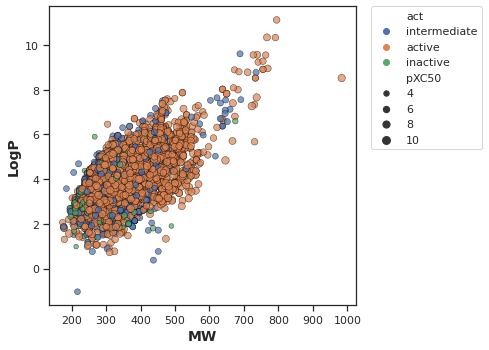

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='MW', y='LogP', data=data_l, hue='act', size='pXC50', edgecolor='black', alpha=0.7)

plt.xlabel('MW', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

##boxplot analysis of the nature of the compounds

###pXC50

Text(0, 0.5, 'pXC50 value')

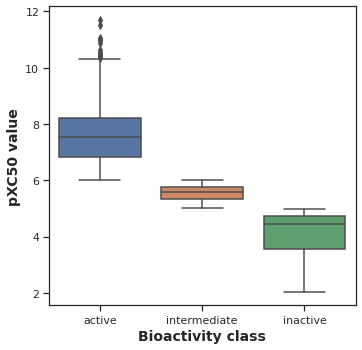

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'act', y = 'pXC50', data = data_l)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pXC50 value', fontsize=14, fontweight='bold')


In [ ]:
def mannwhitney(descriptor, verbose=False):
  np.random.seed(1)

  selection = [descriptor, 'act']
  df = data_l[selection]
  active = df[df['act'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'act']
  df = data_l[selection]
  inactive = df[df['act'] == 'inactive']
  inactive = inactive[descriptor]

  stat, p = mannwhitneyu(active, inactive)

  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])

  return results

In [ ]:
mannwhitney('pXC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pXC50,0.00,0.00,0.05,Different distribution (reject H0)


###MW

Text(0, 0.5, 'MW')

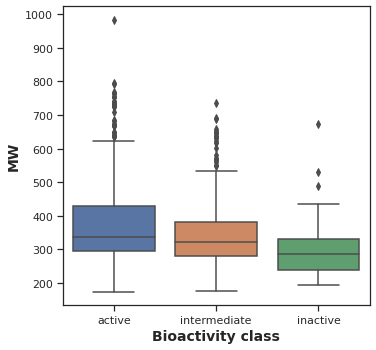

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'act', y = 'MW', data = data_l)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')


In [ ]:
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,151638.00,0.00,0.05,Different distribution (reject H0)


###LogP

Text(0, 0.5, 'LogP')

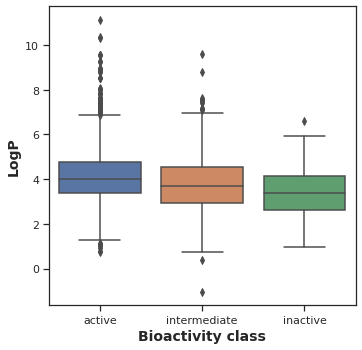

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'act', y = 'LogP', data = data_l)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')


In [ ]:
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,192811.50,0.00,0.05,Different distribution (reject H0)


###NumOfHdonor

Text(0, 0.5, 'NumHDonors')

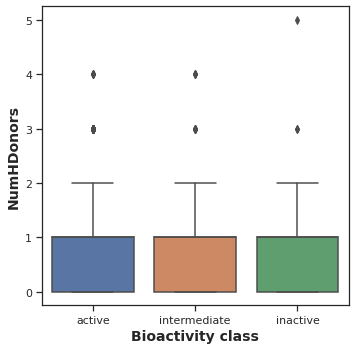

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'act', y = 'NumHDonors', data = data_l)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

In [ ]:
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,231916.50,0.00,0.05,Different distribution (reject H0)


###NumOfHacceptor

Text(0, 0.5, 'NumHAcceptors')

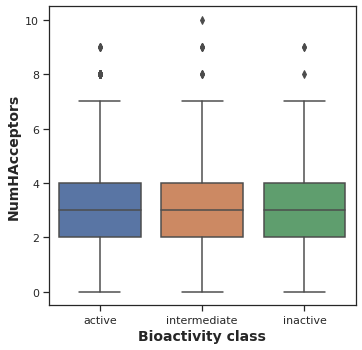

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'act', y = 'NumHAcceptors', data = data_l)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors', fontsize=14, fontweight='bold')


In [ ]:
mannwhitney('NumHAcceptors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHAcceptors,241944.00,0.00,0.05,Different distribution (reject H0)


#Descriptors and fingerprints

##Morgan fingerprint

,Original_Entry_ID,pXC50,SMILES,act,Molecule
0,53319482,5.60,ClC=1C=C([C@H]2[C@H](NC)CCC=3C2=CC=CC3)C=CC1Cl,intermediate,

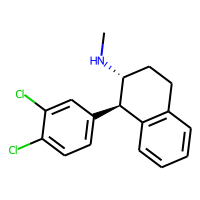

In [ ]:
PandasTools.AddMoleculeColumnToFrame(data,'SMILES','Molecule')
data.head(1)

In [ ]:
data.Molecule.isna().sum()

0

In [ ]:
def mol2fb(mol):
    fp = AllChem.GetHashedMorganFingerprint(mol,2,  nBits=4096)
    ar = np.zeros((1,), dtype=np.int8)
    DataStructs.ConvertToNumpyArray(fp, ar)
    return ar

In [ ]:
data["FPs"] = data.Molecule.apply(mol2fb)

In [ ]:
data.iloc[0,:]

NameError: ignored

##Padel descriptor

In [ ]:
!pip install padelpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 20.9 MB 51.0 MB/s 


In [ ]:
from padelpy import from_smiles

,Original_Entry_ID,pXC50,SMILES,act,Molecule,FPs
0,CHEMBL497963,6.00,N=1C=2C=CC=C(OCCN3CCC(CC3)CC=4C=CC=C(C4)N=S(C)...,active,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
1,CHEMBL202565,5.39,C1CN(CC(CCC)C(=O)C=2C=CC(=CC2)C)CC1,intermediate,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,CHEMBL311469,5.49,C=1C(NC(=O)C)=CC=C2C1CC3=CC=CC=C23,intermediate,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,CHEMBL115253,6.22,N1(C2CC(CC1CC2)OC(C3=CC=C(C=C3)F)C4=CC=C(C=C4)...,active,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,CHEMBL2037432,6.04,N1(CCC(CC1)(O)C=2C=CC(=CC2)Cl)CCCCC=3SC=4C(N3)...,active,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...,...,...
7244,CHEMBL282380,5.74,C=1C=CC(C(C=2C=CC=CC2)OCCN3CCN(CC3)C[C@@H](CC4...,intermediate,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
7245,CHEMBL28149,5.67,C=1C=CC(C(C=2C=CC=CC2)OCCN3CCN(CC3)C[C@H](CC4=...,intermediate,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ..."
7246,44419306,5.26,FC1=CC=C(C[C@H]2C[C@@H](N(CC2)C(=O)C)CCCNC(=O)...,intermediate,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
7247,CHEMBL145534,4.50,C1(C2C(=O)CC(C1C=3C=CC=CC3)CC2)N(C)C,inactive,,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."

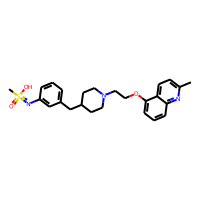
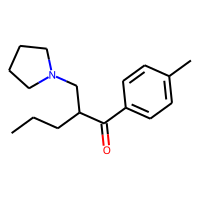
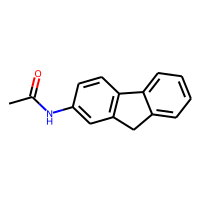
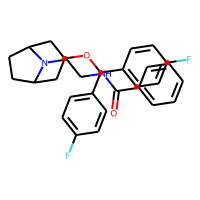
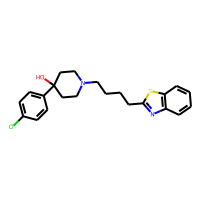
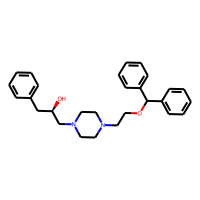
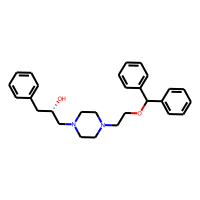
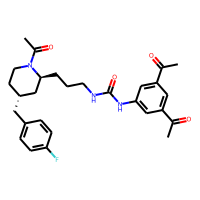
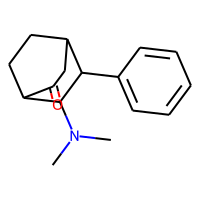
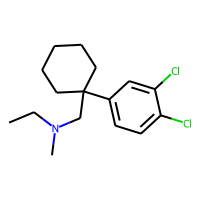

In [ ]:
data

In [ ]:
exp = data.copy()

In [ ]:
d = from_smiles(exp["SMILES"].tolist(), fingerprints=True)

In [ ]:
dd = []
for i in d:
    dd.append(dict(i))

In [ ]:
dff = pd.DataFrame(dd)

In [ ]:
data_final = pd.concat([data,dff])

#Input_Output

In [ ]:
X_old = np.stack(data.FPs.values)
X_old.shape

(4042, 4096)

In [ ]:
feature_select = feature_selection.VarianceThreshold(threshold=0.05)
X = feature_select.fit(X_old)
X = feature_select.transform(X_old)
print(X.shape)

(4042, 203)


In [ ]:
y = data["pXC50"]

In [ ]:
scaler = preprocessing.MinMaxScaler() 
scaler_y = scaler.fit(pd.DataFrame(y))
y = scaler.transform(pd.DataFrame(y))

In [ ]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y,  
                                                                    test_size=0.10, 
                                                                    random_state=42,
                                                                    )


In [ ]:
def data_creator(x, y):

    data = tf.data.Dataset.from_tensor_slices((x, y))
    data = data.shuffle(len(x))
    data = data.batch(32)
    data = data.prefetch(tf.data.experimental.AUTOTUNE)
    return data

train = data_creator(X_train,y_train)
test = data_creator(X_test,y_test)

#Models

##Models without deep learning (Lazy Predict)

In [ ]:
clf = lazypredict.Supervised.LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_test)

100%|██████████| 42/42 [00:52<00:00,  1.24s/it]


In [ ]:
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
NuSVR,0.36,0.68,0.08,10.81
RandomForestRegressor,0.35,0.68,0.08,5.57
ExtraTreesRegressor,0.34,0.67,0.08,6.21
HistGradientBoostingRegressor,0.32,0.66,0.08,2.92
XGBRegressor,0.32,0.66,0.08,1.92
LGBMRegressor,0.30,0.65,0.08,0.43
BaggingRegressor,0.23,0.62,0.08,0.68
SVR,0.20,0.60,0.09,1.07
KNeighborsRegressor,0.18,0.59,0.09,0.73


R-Squared

[(0.0, 1.0)]

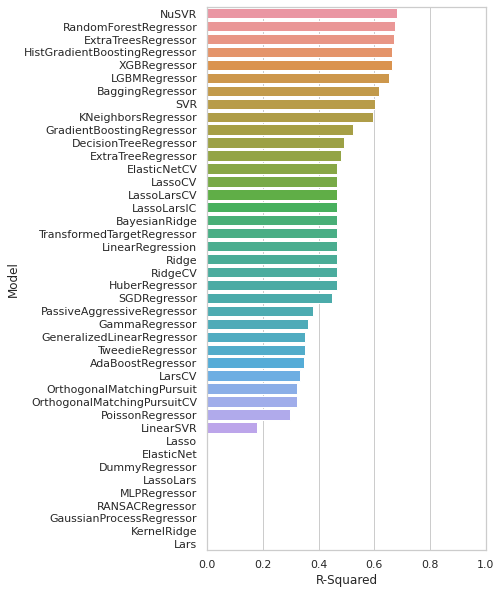

In [ ]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_test.index, x="R-Squared", data=predictions_test)
ax.set(xlim=(0, 1))

RMSE

[(0.0, 10.0)]

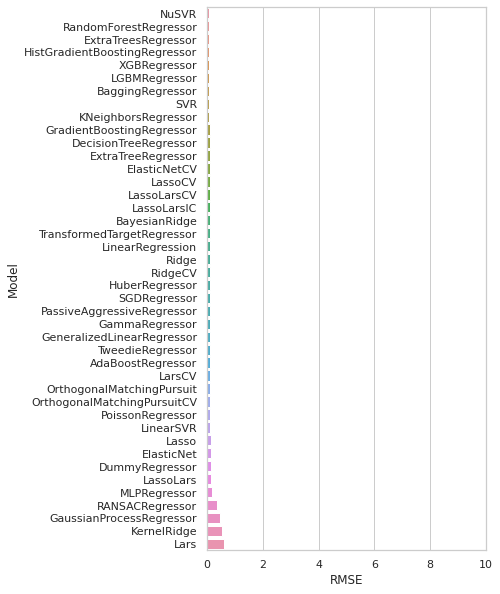

In [ ]:
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_test.index, x="RMSE", data=predictions_test)
ax.set(xlim=(0, 10))

###NuSvr model

In [ ]:
Nu_model = svm.NuSVR()
Nu_model.fit(X_train,y_train)

NuSVR()

In [ ]:
pred = Nu_model.predict(X_test)
print("R2 :",metrics.r2_score(y_test,pred))
print("MSE :",metrics.mean_squared_error(y_test,pred))

R2 : 0.6714822073604358
MSE : 0.00680568431511434


cross val

In [ ]:
def kfold_train_test_split(x, y, train_indices, test_indices):
    return x[train_indices], x[test_indices], y[train_indices], y[test_indices]


In [ ]:
shuffled_k_fold = model_selection.ShuffleSplit(
    n_splits=10
) 
scores = []

for train_indices, test_indices in shuffled_k_fold.split(
    X, y
): 
    x_train_k, x_test_k, y_train_k, y_test_k = kfold_train_test_split(
        X, y, train_indices, test_indices
    )

    Nu_model = svm.NuSVR()
    Nu_model.fit(x_train_k, y_train_k)

    y_pred = Nu_model.predict(x_test_k)

    mse = metrics.mean_squared_error(y_test_k, y_pred)
    r2 = metrics.r2_score(y_test_k, y_pred)

    scores_dict = {"mse": mse, "r2": r2}

    scores.append(scores_dict)

In [ ]:
scores_df = pd.DataFrame(scores)
scores_df

,mse,r2
0,0.00,0.71
1,0.01,0.69
2,0.01,0.66
3,0.00,0.77
4,0.00,0.73
5,0.01,0.74
6,0.01,0.65
7,0.00,0.72
8,0.00,0.74
9,0.01,0.64


In [ ]:
scores_df.mean()

mse   0.01
r2    0.71
dtype: float64

In [ ]:
NuSVR_model = pickle.dumps(Nu_model)
pickle.dump(Nu_model, open('/content/drive/MyDrive/QSAR/Model/NuSVR_model.sav', 'wb'))
 

###XGBR

In [ ]:
import xgboost as xgb
xgbr = xgb.XGBRegressor(verbosity=0)
xgbr.fit(X_train,y_train)
pred = xgbr.predict(X_test)
print("R2 :",metrics.r2_score(y_test,pred))
print("MSE :",metrics.mean_squared_error(y_test,pred))

R2 : 0.6983255432402693
MSE : 0.004976304091068008


In [ ]:
shuffled_k_fold = model_selection.ShuffleSplit(
    n_splits=10
) 
scores = []

for train_indices, test_indices in shuffled_k_fold.split(
    X, y
): 
    x_train, x_test, y_train, y_test = kfold_train_test_split(
        X, y, train_indices, test_indices
    )

    xgbr = xgb.XGBRegressor(verbosity=0)
    xgbr.fit(x_train, y_train)

    y_pred = xgbr.predict(x_test)

    mse = metrics.mean_squared_error(y_test, y_pred)
    r2 = metrics.r2_score(y_test, y_pred)

    scores_dict = {"mse": mse, "r2": r2}

    scores.append(scores_dict)

In [ ]:
scores_df = pd.DataFrame(scores)
scores_df

,mse,r2
0,0.01,0.71
1,0.00,0.73
2,0.00,0.72
3,0.01,0.69
4,0.00,0.74
5,0.01,0.70
6,0.01,0.72
7,0.01,0.75
8,0.01,0.68
9,0.01,0.67


In [ ]:
scores_df.mean()

mse   0.01
r2    0.71
dtype: float64

###feature selection

In [ ]:
def kfold_train_test_split(x,y,train_indices,test_indices):
    return x[train_indices], x[test_indices], y[train_indices], y[test_indices]
    

In [ ]:
def get_best_k_of_features(x,y):

  info = {
    "k": [],
    "r2": [],
    "mse": [],
  }
 
  for i in range(1, len(x.columns) + 1):
    svc = svm.NuSVR(kernel="linear")
    rfe = feature_selection.RFE(estimator=svc, n_features_to_select=i, step=1)
    x_new = rfe.fit_transform(x, y)

    x_train, x_test, y_train, y_test = model_selection.train_test_split(x_new, y, test_size=0.)
    svc = svm.NuSVR(kernel="linear")
    svc.fit(x_train, y_train)
    y_pred = svc.predict(x_test)
    info["k"].append(i)
    info["r2"].append(metrics.r2_score(y_test,y_pred))
    info["mse"].append(metrics.mean_squared_error(y_test,y_pred))

  return pd.DataFrame(info) 

In [ ]:
best_features_info = get_best_k_of_features(pd.DataFrame(X), pd.DataFrame(y))

In [ ]:
plt.plot(best_features_info["k"], best_features_info["r2"])

###Hyperparameter tuning

In [ ]:
svr = svm.NuSVR()

In [ ]:
params = {'kernel':  ['rbf', 'poly', 'sigmoid', "linear"], 'C': [0.01, 0.1,10], "degree": [1,3,5,6]}


In [ ]:
scoring = {
    'r2': metrics.make_scorer(metrics.r2_score),
    'mse': metrics.make_scorer(metrics.mean_squared_error, greater_is_better=False), 
    }

In [ ]:
# kfold = model_selection.StratifiedShuffleSplit(5)

In [ ]:
gs = model_selection.GridSearchCV(svr, params, scoring=scoring, refit="r2", verbose=2)

In [ ]:
gs.fit(X, y)  

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] C=0.01, degree=1, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ..................... C=0.01, degree=1, kernel=rbf, total=   8.9s
[CV] C=0.01, degree=1, kernel=rbf ....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.9s remaining:    0.0s


[CV] ..................... C=0.01, degree=1, kernel=rbf, total=   8.9s
[CV] C=0.01, degree=1, kernel=rbf ....................................
[CV] ..................... C=0.01, degree=1, kernel=rbf, total=   8.8s
[CV] C=0.01, degree=1, kernel=rbf ....................................
[CV] ..................... C=0.01, degree=1, kernel=rbf, total=   8.8s
[CV] C=0.01, degree=1, kernel=rbf ....................................
[CV] ..................... C=0.01, degree=1, kernel=rbf, total=   8.8s
[CV] C=0.01, degree=1, kernel=poly ...................................
[CV] .................... C=0.01, degree=1, kernel=poly, total=   8.2s
[CV] C=0.01, degree=1, kernel=poly ...................................
[CV] .................... C=0.01, degree=1, kernel=poly, total=   7.7s
[CV] C=0.01, degree=1, kernel=poly ...................................
[CV] .................... C=0.01, degree=1, kernel=poly, total=   7.9s
[CV] C=0.01, degree=1, kernel=poly ...................................
[CV] .

In [ ]:
print(gs.best_params_)

In [ ]:
best_svm = gs.best_estimator_

##Deep Learning Model

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input(X_train.shape[-1]),
    tf.keras.layers.Dense(128,activation=tf.keras.activations.relu),
    tf.keras.layers.LayerNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512,activation=tf.keras.activations.relu),
    tf.keras.layers.LayerNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1028,activation=tf.keras.activations.relu),
    tf.keras.layers.LayerNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256,activation=tf.keras.activations.relu),
    tf.keras.layers.LayerNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256,activation=tf.keras.activations.relu),
    tf.keras.layers.LayerNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(), 
    loss=["mse"],
    metrics = ["mse"]
    )

In [ ]:
model.fit(train, epochs=100, validation_data= test)

Epoch 1/100
114/114 [==============================] - 1s 5ms/step - loss: 0.1295 - mse: 0.1295 - val_loss: 0.0259 - val_mse: 0.0259
Epoch 2/100
114/114 [==============================] - 1s 5ms/step - loss: 0.0841 - mse: 0.0841 - val_loss: 0.0413 - val_mse: 0.0413
Epoch 3/100
114/114 [==============================] - 1s 5ms/step - loss: 0.0610 - mse: 0.0610 - val_loss: 0.0388 - val_mse: 0.0388
Epoch 4/100
114/114 [==============================] - 1s 5ms/step - loss: 0.0510 - mse: 0.0510 - val_loss: 0.0328 - val_mse: 0.0328
Epoch 5/100
114/114 [==============================] - 1s 5ms/step - loss: 0.0412 - mse: 0.0412 - val_loss: 0.0253 - val_mse: 0.0253
Epoch 6/100
114/114 [==============================] - 1s 5ms/step - loss: 0.0370 - mse: 0.0370 - val_loss: 0.0301 - val_mse: 0.0301
Epoch 7/100
114/114 [==============================] - 1s 5ms/step - loss: 0.0329 - mse: 0.0329 - val_loss: 0.0262 - val_mse: 0.0262
Epoch 8/100
114/114 [==============================] - 1s 5ms/step - 

In [ ]:
pred = model.predict(X_test)
print("R2 :",metrics.r2_score(y_test,pred))
print("MSE :",metrics.mean_squared_error(y_test,pred))

R2 : 0.6718590040262927
MSE : 0.006899471576704064


###Other exp

In [ ]:
class WideAndDeepModel(tf.keras.Model):
    def __init__(self, input_shape, activation="relu", **kwargs):
        super(WideAndDeepModel, self).__init__(
            **kwargs
        ) 

        self.input_layer = tf.keras.layers.Input(input_shape)
        self.hidden1 = tf.keras.layers.Dense(128, activation=activation)
        self.drop = tf.keras.layers.Dropout(0.4)
        self.hidden2 = tf.keras.layers.Dense(128, activation=activation)
        self.hidden3 = tf.keras.layers.Dense(128, activation=activation)
        self.hidden4 = tf.keras.layers.Dense(128, activation=activation)
        self.out = tf.keras.layers.Dense(1)

    def build_graph(
        self,
    ):
        x = self.input_layer
        return tf.keras.Model(inputs=[x], outputs=self.call(x))

    def call(self, inputs):

        hidden1 = self.hidden1(inputs)
        # hidden 1 ->
        d1 = self.drop(hidden1)
        hidden2 = self.hidden2(d1)
        hidden13 = self.hidden3(d1)
        hidden14 = self.hidden4(d1)
        # hidden 2 ->
        d2 = self.drop(hidden2)
        hidden23 = self.hidden3(d2)
        hidden24 = self.hidden4(d2)
        
        hidden3 = tf.keras.layers.concatenate([hidden13, hidden23])
        # hidden 4 ->
        hidden3_5 = tf.keras.layers.concatenate([hidden14,hidden24])

        hidden4 = tf.keras.layers.concatenate([hidden3,hidden3_5])
        output = self.out(hidden4)

        return output


model = WideAndDeepModel(input_shape=(219))
model.build(input_shape=(None, 219))  # build the model

model.summary()

Model: "wide_and_deep_model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_62 (Dense)            multiple                  28160     
                                                                 
 dropout_8 (Dropout)         multiple                  0         
                                                                 
 dense_63 (Dense)            multiple                  16512     
                                                                 
 dense_64 (Dense)            multiple                  16512     
                                                                 
 dense_65 (Dense)            multiple                  16512     
                                                                 
 dense_66 (Dense)            multiple                  513       
                                                                 
Total params: 78,209
Trainable params: 78,20

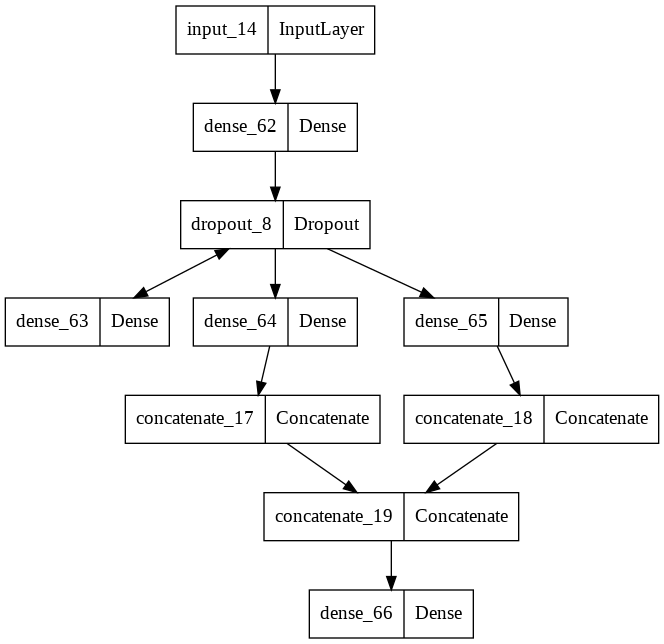

In [ ]:
tf.keras.utils.plot_model(model.build_graph())

In [ ]:
model.compile(
    optimizer=tf.optimizers.Adam(),
    loss=["mse"],
    metrics=["mse"],
)


In [ ]:
model.fit(train, epochs=30, validation_data= test)

Epoch 1/30
204/204 [==============================] - 1s 3ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 2/30
204/204 [==============================] - 1s 3ms/step - loss: 0.0057 - mse: 0.0057 - val_loss: 0.0066 - val_mse: 0.0066
Epoch 3/30
204/204 [==============================] - 1s 3ms/step - loss: 0.0056 - mse: 0.0056 - val_loss: 0.0063 - val_mse: 0.0063
Epoch 4/30
204/204 [==============================] - 1s 3ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0065 - val_mse: 0.0065
Epoch 5/30
204/204 [==============================] - 1s 3ms/step - loss: 0.0053 - mse: 0.0053 - val_loss: 0.0062 - val_mse: 0.0062
Epoch 6/30
204/204 [==============================] - 1s 3ms/step - loss: 0.0051 - mse: 0.0051 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 7/30
204/204 [==============================] - 1s 3ms/step - loss: 0.0052 - mse: 0.0052 - val_loss: 0.0059 - val_mse: 0.0059
Epoch 8/30
204/204 [==============================] - 1s 3ms/step - loss: 0.

In [ ]:
pred = model.predict(X_test)
print("R2 :",metrics.r2_score(y_test,pred))
print("MSE :",metrics.mean_squared_error(y_test,pred))

R2 : 0.6290480196218875
MSE : 0.006728257620225585


##Chemprop Model

In [ ]:
chem_data =data[["SMILES","pXC50"]]
chem_data

,SMILES,pXC50
0,C1=CC=C2N(C=3C=CC(=CC3)F)S(=O)(=O)N(CC[C@H](CN...,5.26
1,S(=O)(C=1C(CN(C)C)=CC=CC1)C=2C(N)=CC(=CC2)C,8.38
2,C1=C(C(=C(OCC(CNC(CC2=CC=C(C=C2)OC)(C)C)O)C=C1...,7.47
3,C1(C(OC(C)C)=O)[C@@H](C=2C=CC(=CC2)Cl)CC3CCC1N...,6.37
4,C1(CN(CC(C)C)C2CCNCC2)=C(F)C=CC=C1C(F)(F)F,8.39
...,...,...
4037,O=C(N1CCN(C2CC2)CCC1)C3=CC(=C(OC=4C=C(C=CC4)C#...,6.91
4038,C12C([C@H](OC(C3=CC=C(C=C3)F)C4=CC=C(C=C4)F)C[...,5.70
4039,C=1(C=CC2=C(C1)CCO[C@H]2CCN3[C@H](CN(CC3)C4=CC...,8.66
4040,BrC1=C(CC2CCN(C3CCC4(OC(=O)C=5C4=CC=C6OCCOC56)...,7.11


In [ ]:
chem_data.to_csv('chem.csv', index=False)

In [ ]:
!pip install chemprop

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 166 kB 27.9 MB/s 
     |████████████████████████████████| 1.6 MB 55.3 MB/s 
     |████████████████████████████████| 3.2 MB 63.1 MB/s 
     |████████████████████████████████| 125 kB 65.7 MB/s 
     |████████████████████████████████| 200 kB 70.4 MB/s 
     |████████████████████████████████| 100 kB 10.9 MB/s 
     |████████████████████████████████| 121 kB 76.6 MB/s 
     |████████████████████████████████| 84 kB 5.0 MB/s 
     |████████████████████████████████| 90 kB 12.4 MB/s 
     |████████████████████████████████| 11.3 MB 61.9 MB/s 
  Created wheel for chemprop: filename=chemprop-1.5.2-py3-none-any.whl size=149147 sha256=f33eead3a6ec4a1a323c111e112e8d94aeeba1ccd176682c4cb9b1c77afe55f6
  Stored in directory: /root/.cache/pip/wheels/56/f7/3d/f08c2569269b1ae8642cbca56e46a1e0e4225de416fc6d70af
  Created wheel for typed-argument-parser: filename=typed_arg

In [ ]:
import chemprop

In [ ]:
arguments = [
    '--data_path', '/content/chem.csv',
    '--dataset_type', 'regression',
    '--save_dir', 'test_checkpoints_reg',
    '--epochs', '70',
    '--save_smiles_splits'
]

args = chemprop.args.TrainArgs().parse_args(arguments)
mean_score, std_score = chemprop.train.cross_validate(args=args, train_func=chemprop.train.run_training)

Command line
python /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-1f8cd747-0a42-41c6-91c4-6c4d3e3311d5.json
Args
{'activation': 'ReLU',
 'adding_h': False,
 'aggregation': 'mean',
 'aggregation_norm': 100,
 'atom_descriptor_scaling': True,
 'atom_descriptors': None,
 'atom_descriptors_path': None,
 'atom_descriptors_size': 0,
 'atom_features_size': 0,
 'atom_messages': False,
 'batch_size': 50,
 'bias': False,
 'bias_solvent': False,
 'bond_feature_scaling': True,
 'bond_features_path': None,
 'bond_features_size': 0,
 'cache_cutoff': 10000,
 'checkpoint_dir': None,
 'checkpoint_frzn': None,
 'checkpoint_path': None,
 'checkpoint_paths': None,
 'class_balance': False,
 'config_path': None,
 'crossval_index_dir': None,
 'crossval_index_file': None,
 'crossval_index_sets': None,
 'cuda': True,
 'data_path': '/content/chem.csv',
 'data_weights_path': None,
 'dataset_type': 'regression',
 'depth': 3,
 'depth_solvent': 3,
 'device'

In [ ]:
arguments = [
    '--test_path', '/content/test_checkpoints_reg/fold_0/test_smiles.csv',
    '--preds_path', 'test_preds_reg.csv',
    '--checkpoint_dir', 'test_checkpoints_reg'
]

args = chemprop.args.PredictArgs().parse_args(arguments)
preds = chemprop.train.make_predictions(args=args)

Loading training args


405it [00:00, 127033.59it/s]
  0%|          | 0/9 [00:00<?, ?it/s]

Setting molecule featurization parameters to default.
Loading data
Validating SMILES
Test size = 405
Loading pretrained parameter "encoder.encoder.0.cached_zero_vector".
Loading pretrained parameter "encoder.encoder.0.W_i.weight".
Loading pretrained parameter "encoder.encoder.0.W_h.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.weight".
Loading pretrained parameter "encoder.encoder.0.W_o.bias".
Loading pretrained parameter "ffn.1.weight".
Loading pretrained parameter "ffn.1.bias".
Loading pretrained parameter "ffn.4.weight".
Loading pretrained parameter "ffn.4.bias".
Moving model to cuda



100%|██████████| 1/1 [00:00<00:00,  1.02it/s]

Saving predictions to test_preds_reg.csv
Elapsed time = 0:00:01


In [ ]:
pred = pd.read_csv("/content/test_preds_reg.csv")
pred
true = pd.read_csv("/content/test_checkpoints_reg/fold_0/test_full.csv")
true

,SMILES,pXC50
0,C(C1=CC=C(C=C1)C(C)C)(CC(C)C)C2NCCCC2,5.77
1,N1(N=C(C=C1C)C(F)(F)F)C[C@@]23CNCC[C@]2(C4=CC(...,9.00
2,C12C3C4C5C1C6C(C4C(C62)(N3CCC7=CC=CC=C7OC)O)C5,6.26
3,ClC=1C=C([C@@H]2C[C@@H](NC)CC=3C2=CC=CC3)C=CC1Cl,8.22
4,C1(=CC(CNC)=C(OC=2C(=CC(Cl)=CC2)C)C=C1)N=S(C)(...,7.80
...,...,...
400,C=1(C=CC(C(OCCC2CCN(CC2)C[C@H](CC3=CC=CC=C3)C)...,7.00
401,ClC=1C(C(C2(O)CCCCC2)CN(C)C)=CC=CC1,6.75
402,C12C([C@@H](OC(C3=CC=C(C=C3)Cl)C=4C=CC=CC4)CC(...,5.22
403,C1CC[C@@H]([C@@H](C1)C(OC)=O)C=2C=CC=CC2,2.82


In [ ]:
print("R2 :",metrics.r2_score(true["pXC50"],pred["pXC50"]))
print("MSE :",metrics.mean_squared_error(true["pXC50"],pred["pXC50"]))

R2 : 0.7614299563895316
MSE : 0.43255433348964895


#Gradio

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
loaded_NuSVR_model = pickle.load(open('/content/drive/MyDrive/QSAR/Model/NuSVR_model.sav', 'rb')) 

In [ ]:
pred = loaded_NuSVR_model.predict(X_test)
print("R2 :",metrics.r2_score(y_test,pred))
print("MSE :",metrics.mean_squared_error(y_test,pred))

R2 : 0.7876445899702545
MSE : 0.0037349165508345165


In [ ]:
def qsar_prediction(x):
    mol = Chem.MolFromSmiles(x)
    fp = AllChem.GetHashedMorganFingerprint(mol,2,  nBits=4096)
    ar = np.zeros((1,), dtype=np.int8)
    DataStructs.ConvertToNumpyArray(fp, ar)

    x = feature_select.transform(ar.reshape(1,-1))
    pred = loaded_NuSVR_model.predict(x)
    scaled_pred = scaler.inverse_transform(pred.reshape(-1,1))
    return scaled_pred[0][0]

In [ ]:

d = qsar_prediction("COc1ccc2c(c1)[nH]c3c(C)nccc23")
d

5.492629981865893

In [ ]:
gr.Interface(
    fn=qsar_prediction,
    inputs=gr.inputs.Textbox(label="Molecule Smile"),
    outputs=gr.outputs.Textbox(label="pXC50"),
    title="QSAR",
    description="This model will predict the -Log(concentraion) of the compound that will inhibit the Serotonin transporter in Homo Sapiens.the below exampls are prozac and paxil",
    examples=["CNCCC(C1=CC=CC=C1)OC2=CC=C(C=C2)C(F)(F)F","C1CNC[C@H]([C@@H]1C2=CC=C(C=C2)F)COC3=CC4=C(C=C3)OCO4"]
).launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Running on public URL: https://26240.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7f96d0764a10>,
 'http://127.0.0.1:7860/',
 'https://26240.gradio.app')

In [ ]:
b = pd.read_csv("/content/CID_5281404_bioactivity.csv")

In [ ]:
b = b[b["targetname"].notna()]

In [ ]:
b

,baid,targetname,aid,sid,cid,geneid,pmid,aidtype,aidmdate,hasdrc,...,acvalue,aidsrcname,aidname,cmpdname,targeturl,ecs,repacxn,taxids,cellids,targettaxid
0,304399542,vpr - Vpr (Human immunodeficiency virus 1),651644,49647165,5281404,155807.00,nan,Confirmatory,20121016,1,...,nan,National Center for Advancing Translational Sc...,qHTS Assay for Inhibitors of the HIV-1 protein...,Harman,/gene/155807,NaN,NP_057852,11676,nan,nan
1,243805611,vif - Vif (Human immunodeficiency virus 1),602346,49647165,5281404,155459.00,nan,Screening,20120309,0,...,nan,Broad Institute,Identification of VIF Inhibitors Measured in C...,Harman,/gene/155459,NaN,P69723,11676,nan,nan
2,10653674,tsaE - tRNA (N6-adenosine(37)-N6)-threonylcarb...,605,11111276,5281404,58460285.00,nan,Confirmatory,20070316,0,...,nan,National Center for Advancing Translational Sc...,qHTS Assay for Inhibitors of YjeE,Harman,/gene/58460285,NaN,P0AF67,562|83333,nan,nan
3,10700894,tsaE - tRNA (N6-adenosine(37)-N6)-threonylcarb...,605,11113939,5281404,58460285.00,nan,Confirmatory,20070316,0,...,nan,National Center for Advancing Translational Sc...,qHTS Assay for Inhibitors of YjeE,Harman,/gene/58460285,NaN,P0AF67,562|83333,nan,nan
4,10758064,tsaE - tRNA (N6-adenosine(37)-N6)-threonylcarb...,605,11111277,5281404,58460285.00,nan,Confirmatory,20070316,0,...,nan,National Center for Advancing Translational Sc...,qHTS Assay for Inhibitors of YjeE,Harman,/gene/58460285,NaN,P0AF67,562|83333,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,359074682,ABCB1 - ATP binding cassette subfamily B membe...,1347075,49647165,5281404,5243.00,nan,Confirmatory,20190731,0,...,nan,National Center for Advancing Translational Sc...,qHTS assay for MDR1-selective chemotherapeutic...,Harman,/gene/5243,NaN,NaN,9606,nan,nan
1315,359078007,ABCB1 - ATP binding cassette subfamily B membe...,1347075,124880330,5281404,5243.00,nan,Confirmatory,20190731,0,...,nan,National Center for Advancing Translational Sc...,qHTS assay for MDR1-selective chemotherapeutic...,Harman,/gene/5243,NaN,NaN,9606,nan,nan
1316,359662041,ABCB1 - ATP binding cassette subfamily B membe...,1347076,124880330,5281404,5243.00,nan,Confirmatory,20190731,0,...,nan,National Center for Advancing Translational Sc...,qHTS assay for MDR1-selective chemotherapeutic...,Harman,/gene/5243,NaN,NaN,9606,nan,nan
1317,359665180,ABCB1 - ATP binding cassette subfamily B membe...,1347076,49647165,5281404,5243.00,nan,Confirmatory,20190731,0,...,nan,National Center for Advancing Translational Sc...,qHTS assay for MDR1-selective chemotherapeutic...,Harman,/gene/5243,NaN,NaN,9606,nan,nan
